In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.utils import check_metric
from sklearn.model_selection import train_test_split

# Datos de satisfacción de pasajeros de aerolínea
#### Dataset ya analizado, depurado y trabajado en *EDA.ipynb*.

In [2]:
full_data = pd.read_csv('data/data_final.csv')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Customer Type                      129880 non-null  object
 1   Age                                129880 non-null  int64 
 2   Type of Travel                     129880 non-null  object
 3   Class                              129880 non-null  object
 4   Flight Distance                    129880 non-null  int64 
 5   Departure/Arrival time convenient  129880 non-null  int64 
 6   Gate location                      129880 non-null  int64 
 7   Food and drink                     129880 non-null  int64 
 8   On-board service                   129880 non-null  int64 
 9   Leg room service                   129880 non-null  int64 
 10  Baggage handling                   129880 non-null  int64 
 11  Checkin service                    129880 non-null  

#### El tamaño del dataset es relativamente grande por lo que en pos de agilizar los tiempos de modelado y entrenamiento se reduce a un 20%

In [3]:
data_sample = full_data.sample(frac=0.2).reset_index(drop=True)
del full_data

# Vemos si continúa balanceado
data_sample['satisfaction'].value_counts() / data_sample.shape[0] * 100

neutral or dissatisfied    56.348168
satisfied                  43.651832
Name: satisfaction, dtype: float64

In [4]:
data_sample['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}, inplace = True)
# necesario para que muestre las métricas de score en el output de predict_model, de lo contrario se debe usar check_metric

In [5]:
data, hidden_data = train_test_split(data_sample, test_size=0.25)
del data_sample

print("Model data (75%): ", data.shape)
print("Hidden data (25%): ", hidden_data.shape)

Model data (75%):  (19482, 17)
Hidden data (25%):  (6494, 17)


In [6]:
data.head(1)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Food and drink,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,satisfaction,Flight Delay,Online Services,Cabin comfort
1585,Loyal Customer,2,Business travel,Business,2,3,3,3,4,4,4,5,4,1,1,4,4


### setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [7]:
setup_info = setup(data=data, target='satisfaction', session_id=1234)

,Description,Value
0,session_id,1234
1,Target,satisfaction
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(19482, 17)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


### compare_models
This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [8]:
top3 = compare_models(n_select = 3)
print('\n\n', top3[0])
print('\n\n', top3[1])
print('\n\n', top3[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9281,0.9774,0.8962,0.9366,0.9158,0.8531,0.8539,0.1030
et,Extra Trees Classifier,0.9209,0.9712,0.8814,0.9340,0.9068,0.8382,0.8394,0.5110
rf,Random Forest Classifier,0.9193,0.9723,0.8776,0.9340,0.9048,0.8349,0.8363,0.4640
gbc,Gradient Boosting Classifier,0.9166,0.9715,0.8764,0.9289,0.9018,0.8294,0.8307,0.7560
lr,Logistic Regression,0.9016,0.9575,0.8670,0.9039,0.8850,0.7991,0.7997,1.0270
ridge,Ridge Classifier,0.9014,0.0000,0.8643,0.9057,0.8844,0.7985,0.7993,0.0240
lda,Linear Discriminant Analysis,0.9013,0.9558,0.8643,0.9056,0.8844,0.7984,0.7991,0.1180
svm,SVM - Linear Kernel,0.9003,0.0000,0.8618,0.9063,0.8831,0.7964,0.7976,0.0650
ada,Ada Boost Classifier,0.8969,0.9557,0.8675,0.8935,0.8802,0.7898,0.7901,0.2400
dt,Decision Tree Classifier,0.8841,0.8831,0.8699,0.8656,0.8677,0.7646,0.7647,0.0550




 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1234, verbose=0,
                     warm_start=False)


 

### create_model
This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [9]:
model = create_model('lightgbm')
print('\n\n', model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9355,0.9819,0.9027,0.9472,0.9244,0.8682,0.8690
1,0.9391,0.9813,0.9211,0.9385,0.9297,0.8761,0.8762
2,0.9216,0.9742,0.9144,0.9068,0.9106,0.8407,0.8407
3,0.9333,0.9802,0.8859,0.9583,0.9207,0.8633,0.8652
4,0.9311,0.9775,0.8876,0.9514,0.9184,0.8589,0.8604
5,0.9238,0.9750,0.8908,0.9315,0.9107,0.8442,0.8449
6,0.9245,0.9774,0.8924,0.9316,0.9116,0.8457,0.8463
7,0.9274,0.9781,0.8840,0.9460,0.9140,0.8513,0.8527
8,0.9259,0.9745,0.9008,0.9273,0.9139,0.8489,0.8492




 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### tune_model
This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [10]:
model = tune_model(model)
print('\n\n', model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9348,0.9816,0.9027,0.9455,0.9236,0.8667,0.8674
1,0.9311,0.9804,0.9077,0.9328,0.9201,0.8595,0.8598
2,0.9172,0.9723,0.9010,0.9086,0.9048,0.8315,0.8315
3,0.9384,0.9796,0.8960,0.9604,0.9271,0.8739,0.8755
4,0.9172,0.9744,0.8742,0.9320,0.9022,0.8305,0.8317
5,0.9252,0.9743,0.8941,0.9317,0.9125,0.8473,0.8478
6,0.9260,0.9759,0.8941,0.9333,0.9133,0.8487,0.8493
7,0.9171,0.9772,0.8672,0.9382,0.9013,0.8300,0.8319
8,0.9208,0.9723,0.8975,0.9191,0.9082,0.8385,0.8387




 LGBMClassifier(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=30, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1234, reg_alpha=0.005, reg_lambda=0.05,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


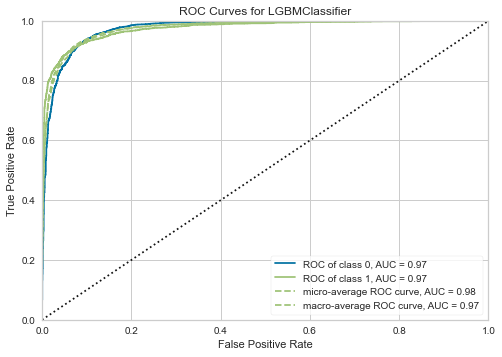

In [11]:
plot_model(model, plot = 'auc')
#Graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

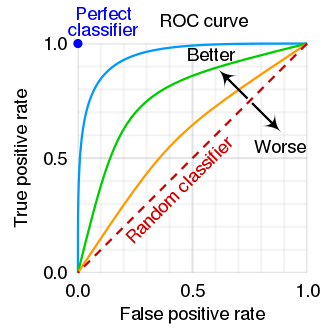

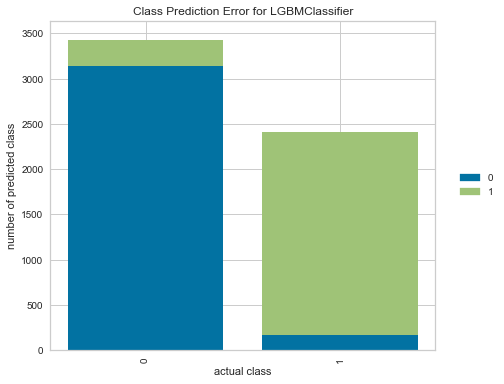

In [12]:
plot_model(model, plot = 'error')

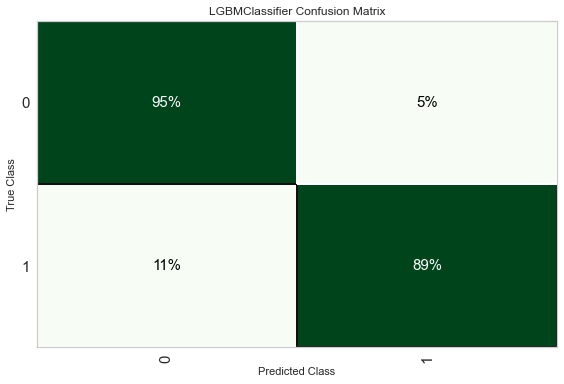

In [13]:
plot_model(model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

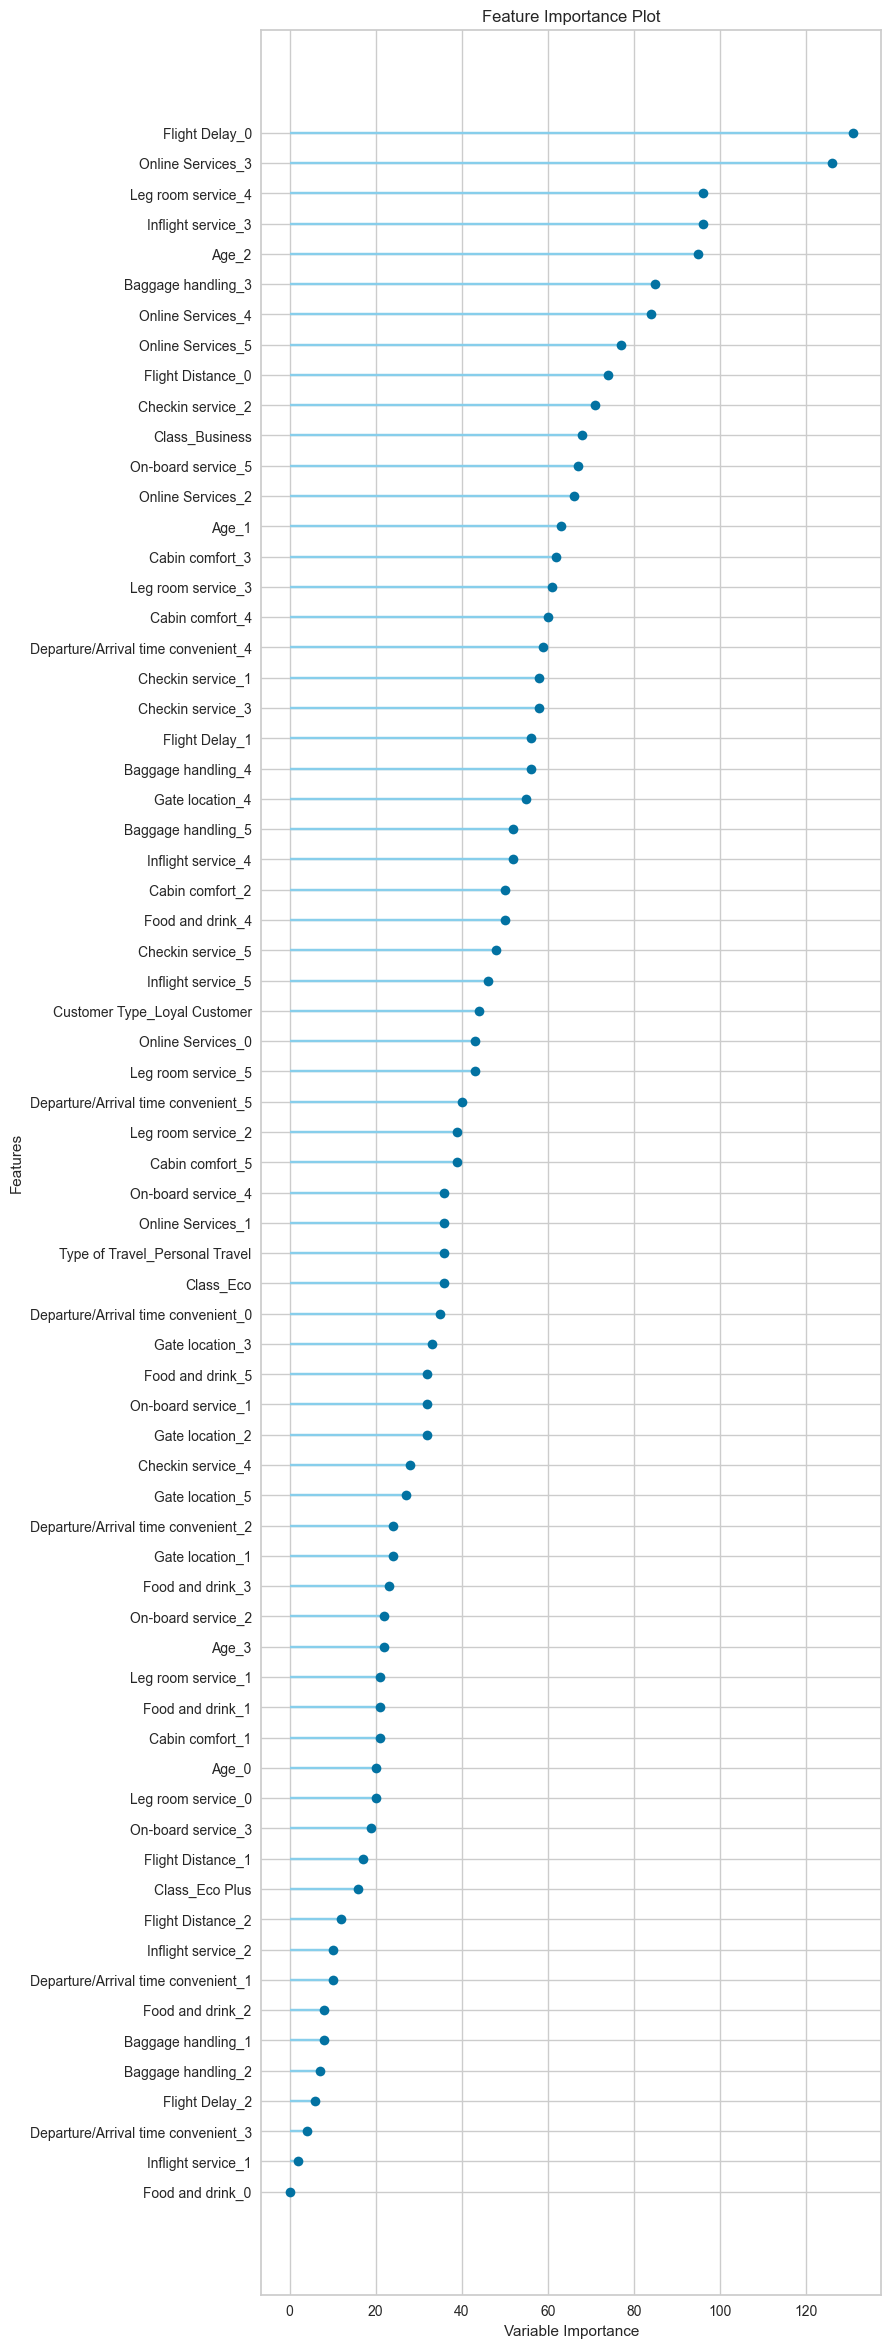

In [14]:
plot_model(model, plot='feature_all')

### predict_model
This function predicts Label and Score (probability of predicted class) using a trained model. When data is None, it predicts label and score on the holdout set.

In [15]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9218,0.9742,0.8860,0.9304,0.9077,0.8400,0.8407


,Customer Type_Loyal Customer,Age_0,Age_1,Age_2,Age_3,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_0,...,Online Services_4,Online Services_5,Cabin comfort_1,Cabin comfort_2,Cabin comfort_3,Cabin comfort_4,Cabin comfort_5,satisfaction,Label,Score
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8035
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8504
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8336
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9377
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8860
5841,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7206
5842,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9537
5843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.7640


### finalize_model
This function trains a given estimator on the entire dataset including the holdout set.

In [16]:
model = finalize_model(model)
print(model)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=30, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1234, reg_alpha=0.005, reg_lambda=0.05,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [17]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9316,0.9822,0.9006,0.9391,0.9195,0.8600,0.8606


,Customer Type_Loyal Customer,Age_0,Age_1,Age_2,Age_3,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_0,...,Online Services_4,Online Services_5,Cabin comfort_1,Cabin comfort_2,Cabin comfort_3,Cabin comfort_4,Cabin comfort_5,satisfaction,Label,Score
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8604
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8092
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8367
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9420
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9078
5841,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7809
5842,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9442
5843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.7379


In [18]:
predict_model(model, data=hidden_data).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9289,0.9779,0.9091,0.9273,0.9181,0.8552,0.8554


,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Food and drink,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,satisfaction,Flight Delay,Online Services,Cabin comfort,Label,Score
17888,disloyal Customer,1,Business travel,Business,0,1,4,4,5,5,2,5,5,0,2,1,4,0,0.8742
8901,Loyal Customer,2,Business travel,Business,1,0,4,4,5,5,5,4,5,1,0,1,5,1,0.9493
17577,disloyal Customer,1,Business travel,Business,1,4,4,5,4,2,4,4,5,0,0,4,5,1,0.7184
1773,Loyal Customer,1,Personal Travel,Eco,0,1,2,3,2,5,2,2,2,0,0,3,3,0,0.9594
14987,Loyal Customer,2,Personal Travel,Eco,1,3,4,3,5,4,5,3,2,0,2,3,4,0,0.9465


### blend_models
This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [19]:
blender = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9311,0.9804,0.8909,0.9482,0.9187,0.8590,0.8602
1,0.9340,0.9803,0.9094,0.9377,0.9233,0.8654,0.8658
2,0.9223,0.9742,0.9077,0.9139,0.9108,0.8419,0.8420
3,0.9377,0.9809,0.8960,0.9587,0.9263,0.8724,0.8739
4,0.9238,0.9759,0.8725,0.9489,0.9091,0.8436,0.8458
5,0.9245,0.9728,0.8874,0.9362,0.9111,0.8456,0.8465
6,0.9245,0.9753,0.8924,0.9316,0.9116,0.8457,0.8463
7,0.9244,0.9768,0.8824,0.9409,0.9107,0.8453,0.8466
8,0.9222,0.9742,0.8958,0.9237,0.9096,0.8414,0.8417


In [20]:
blender = tune_model(blender)
print('\n\n', blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9340,0.9818,0.9010,0.9454,0.9227,0.8652,0.8660
1,0.9377,0.9818,0.9211,0.9353,0.9281,0.8731,0.8732
2,0.9260,0.9744,0.9161,0.9146,0.9153,0.8495,0.8495
3,0.9348,0.9811,0.8893,0.9584,0.9225,0.8663,0.8681
4,0.9289,0.9773,0.8809,0.9528,0.9154,0.8542,0.8562
5,0.9245,0.9745,0.8891,0.9346,0.9113,0.8456,0.8464
6,0.9238,0.9766,0.8908,0.9315,0.9107,0.8442,0.8449
7,0.9274,0.9779,0.8874,0.9429,0.9143,0.8514,0.8525
8,0.9230,0.9753,0.9025,0.9195,0.9109,0.8431,0.8432




 VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1234, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn'...
                                                     max_features='auto',
                           

In [21]:
predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9227,0.9760,0.8892,0.9295,0.9089,0.8418,0.8424


,Customer Type_Loyal Customer,Age_0,Age_1,Age_2,Age_3,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_0,...,Online Services_4,Online Services_5,Cabin comfort_1,Cabin comfort_2,Cabin comfort_3,Cabin comfort_4,Cabin comfort_5,satisfaction,Label,Score
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8777
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8616
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8464
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8861
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8977
5841,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7219
5842,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9883
5843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.7519


In [22]:
blender = finalize_model(blender)
predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9891,0.9997,0.9811,0.9936,0.9873,0.9777,0.9777


,Customer Type_Loyal Customer,Age_0,Age_1,Age_2,Age_3,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_0,...,Online Services_4,Online Services_5,Cabin comfort_1,Cabin comfort_2,Cabin comfort_3,Cabin comfort_4,Cabin comfort_5,satisfaction,Label,Score
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9578
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8565
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9398
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9856
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9667
5841,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8737
5842,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9682
5843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8822


In [23]:
results = predict_model(blender, data=hidden_data)
results.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9292,0.9788,0.9059,0.9307,0.9181,0.8557,0.8560


,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Food and drink,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,satisfaction,Flight Delay,Online Services,Cabin comfort,Label,Score
17888,disloyal Customer,1,Business travel,Business,0,1,4,4,5,5,2,5,5,0,2,1,4,0,0.8998
8901,Loyal Customer,2,Business travel,Business,1,0,4,4,5,5,5,4,5,1,0,1,5,1,0.9864
17577,disloyal Customer,1,Business travel,Business,1,4,4,5,4,2,4,4,5,0,0,4,5,1,0.7334
1773,Loyal Customer,1,Personal Travel,Eco,0,1,2,3,2,5,2,2,2,0,0,3,3,0,0.9693
14987,Loyal Customer,2,Personal Travel,Eco,1,3,4,3,5,4,5,3,2,0,2,3,4,0,0.9268


In [24]:
check_metric(results['satisfaction'], results['Label'], metric = 'Accuracy')

0.9292

In [25]:
save_model(blender,'./blender_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='satisfaction',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
                                                      